In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize']=10,5
plt.rcParams['font.size']="9"

In [2]:
match_df= pd.read_csv('epl.csv')
match_df.drop(columns=match_df.columns[0], axis=1, inplace=True)

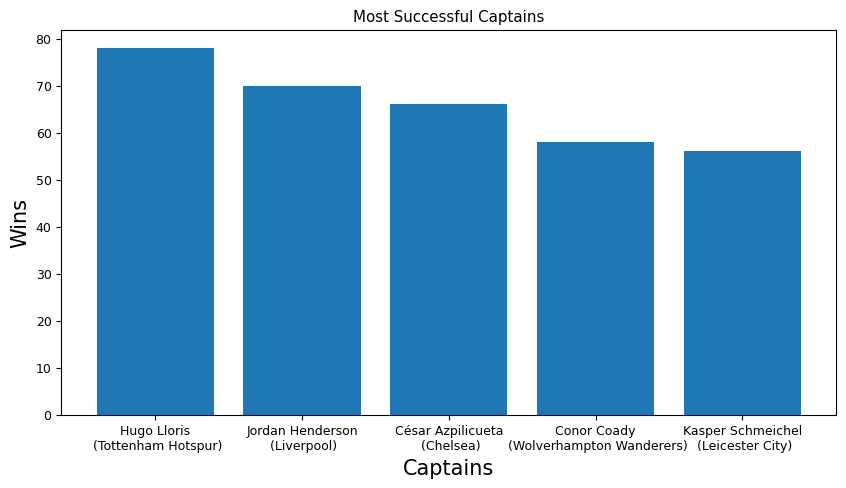

In [3]:
capwins_dict = dict()
for currIndx, currRow in match_df.iterrows():
    if currRow["result"] == "W":
        capwins_dict[currRow["captain"] + '\n (' +currRow['team'] +')'] = capwins_dict.get(currRow["captain"] + '\n (' +currRow['team'] +')',0)+1
caps_list = []
for key,val in capwins_dict.items():
    caps_list.append((key,val))
caps_list = sorted(caps_list, key = lambda x: (x[1],x[0]), reverse=True)
captains = [a for (a,b) in caps_list[:5]]
wins = [b for (a,b) in caps_list[:5]]

plt.bar(captains, wins)
plt.title('Most Successful Captains')
plt.xlabel('Captains', fontsize=15)
plt.ylabel('Wins', fontsize=15)
plt.show()


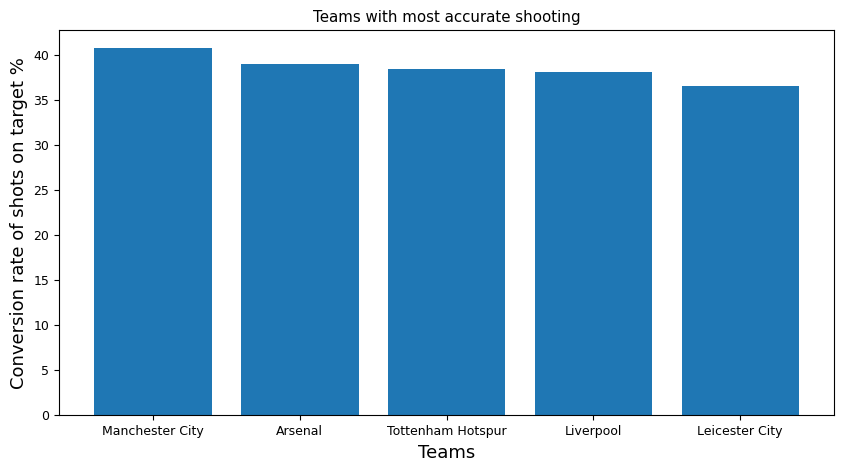

In [4]:

sotSum= match_df.groupby('team')['sot'].sum()
gfSum= match_df.groupby('team')['gf'].sum()

convRate = (gfSum/sotSum)*100

top5 = convRate.nlargest(n=5)

plt.bar(top5.index, top5)
plt.title('Teams with most accurate shooting')
plt.xlabel('Teams', fontsize=13)
plt.ylabel('Conversion rate of shots on target %', fontsize=13)
plt.show()


In [5]:
new_df = pd.to_datetime(match_df.date.astype(str) + ' ' +match_df.time.astype(str))
match_df.insert(2, 'datetime', new_df)
match_df['datetime'] = pd.to_datetime(match_df['datetime'])

In [6]:
#create dataset with different counts per match
match_df = match_df.sort_values(by='datetime')
match_df.loc[match_df['venue'] == 'Home', 'home_team_name'] = match_df['team']
match_df.loc[match_df['venue'] == 'Away', 'home_team_name'] = match_df['opponent']
match_df.loc[match_df['venue'] == 'Home', 'away_team_name'] = match_df['opponent']
match_df.loc[match_df['venue'] == 'Away', 'away_team_name'] = match_df['team']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'home_team_goal_count'] = match_df['gf']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'away_team_goal_count'] = match_df['ga']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'home_team_goal_count'] = match_df['ga']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'away_team_goal_count'] = match_df['gf']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'away_team_shots'] = match_df['sh'].shift(-1)
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'home_team_shots'] = match_df['sh']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'home_team_shots'] = match_df['sh'].shift(-1)
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'away_team_shots'] = match_df['sh']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'away_team_shots_on_target'] = match_df['sot'].shift(-1)
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'home_team_shots_on_target'] = match_df['sot']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'home_team_shots'] = match_df['sot'].shift(-1)
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'away_team_shots_on_target'] = match_df['sot']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'away_team_possession'] = match_df['poss'].shift(-1)
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Home'), 'home_team_possession'] = match_df['poss']
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'home_team_possession'] = match_df['poss'].shift(-1)
match_df.loc[(match_df['datetime'] == match_df['datetime'].shift(-1)) & (match_df['venue'] == 'Away'), 'away_team_possession'] = match_df['poss']
match_df = match_df.dropna(subset=['away_team_shots', 'home_team_shots','away_team_shots_on_target','home_team_shots_on_target','home_team_possession','away_team_possession','home_team_goal_count','away_team_goal_count'])
match_df

,date,time,datetime,comp,round,day,venue,result,gf,ga,...,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,away_team_shots,home_team_shots,away_team_shots_on_target,home_team_shots_on_target,away_team_possession,home_team_possession
2819,01-09-2018,12:30,2018-01-09 12:30:00,Premier League,Matchweek 4,Sat,Home,L,1,2,...,Leicester City,Liverpool,1.0,2.0,10.0,12.0,4.0,5.0,49.0,51.0
2933,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,L,0,2,...,Crystal Palace,Southampton,0.0,2.0,10.0,20.0,5.0,6.0,58.0,50.0
2781,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,D,1,1,...,Everton,Huddersfield,1.0,1.0,9.0,11.0,6.0,1.0,43.0,57.0
2591,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,W,2,0,...,Chelsea,Bournemouth,2.0,0.0,13.0,24.0,3.0,6.0,42.0,72.0
3123,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,D,2,2,...,Brighton and Hove Albion,Fulham,2.0,2.0,13.0,13.0,3.0,3.0,48.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,11-05-2022,19:45,2022-11-05 19:45:00,Premier League,Matchweek 21,Wed,Home,W,3,0,...,Leicester City,Norwich City,3.0,0.0,16.0,20.0,5.0,8.0,52.0,65.0
609,11-05-2022,20:15,2022-11-05 20:15:00,Premier League,Matchweek 33,Wed,Home,L,1,5,...,Wolverhampton Wanderers,Manchester City,1.0,5.0,15.0,7.0,5.0,3.0,66.0,34.0
712,12-02-2022,15:00,2022-12-02 15:00:00,Premier League,Matchweek 25,Sat,Home,D,0,0,...,Brentford,Crystal Palace,0.0,0.0,9.0,9.0,1.0,2.0,36.0,42.0
938,12-02-2022,15:00,2022-12-02 15:00:00,Premier League,Matchweek 25,Sat,Home,L,0,2,...,Watford,Brighton,0.0,2.0,7.0,9.0,0.0,1.0,58.0,36.0


In [7]:
match_df.loc[match_df['home_team_goal_count'] == match_df['away_team_goal_count'], 'home_team_result'] = 'D'
match_df.loc[match_df['home_team_goal_count'] > match_df['away_team_goal_count'], 'home_team_result'] = 'W'
match_df.loc[match_df['home_team_goal_count'] < match_df['away_team_goal_count'], 'home_team_result'] = 'L'

match_df.loc[match_df['home_team_goal_count'] == match_df['away_team_goal_count'], 'away_team_result'] = 'D'
match_df.loc[match_df['home_team_goal_count'] > match_df['away_team_goal_count'], 'away_team_result'] = 'L'
match_df.loc[match_df['home_team_goal_count'] < match_df['away_team_goal_count'], 'away_team_result'] = 'W'
match_df

,date,time,datetime,comp,round,day,venue,result,gf,ga,...,home_team_goal_count,away_team_goal_count,away_team_shots,home_team_shots,away_team_shots_on_target,home_team_shots_on_target,away_team_possession,home_team_possession,home_team_result,away_team_result
2819,01-09-2018,12:30,2018-01-09 12:30:00,Premier League,Matchweek 4,Sat,Home,L,1,2,...,1.0,2.0,10.0,12.0,4.0,5.0,49.0,51.0,L,W
2933,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,L,0,2,...,0.0,2.0,10.0,20.0,5.0,6.0,58.0,50.0,L,W
2781,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,D,1,1,...,1.0,1.0,9.0,11.0,6.0,1.0,43.0,57.0,D,D
2591,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,W,2,0,...,2.0,0.0,13.0,24.0,3.0,6.0,42.0,72.0,W,L
3123,01-09-2018,15:00,2018-01-09 15:00:00,Premier League,Matchweek 4,Sat,Home,D,2,2,...,2.0,2.0,13.0,13.0,3.0,3.0,48.0,42.0,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,11-05-2022,19:45,2022-11-05 19:45:00,Premier League,Matchweek 21,Wed,Home,W,3,0,...,3.0,0.0,16.0,20.0,5.0,8.0,52.0,65.0,W,L
609,11-05-2022,20:15,2022-11-05 20:15:00,Premier League,Matchweek 33,Wed,Home,L,1,5,...,1.0,5.0,15.0,7.0,5.0,3.0,66.0,34.0,L,W
712,12-02-2022,15:00,2022-12-02 15:00:00,Premier League,Matchweek 25,Sat,Home,D,0,0,...,0.0,0.0,9.0,9.0,1.0,2.0,36.0,42.0,D,D
938,12-02-2022,15:00,2022-12-02 15:00:00,Premier League,Matchweek 25,Sat,Home,L,0,2,...,0.0,2.0,7.0,9.0,0.0,1.0,58.0,36.0,L,W


In [8]:
homeTeam = match_df[[
 'datetime',
 'home_team_name',
 'home_team_goal_count',
 'home_team_shots',
 'home_team_shots_on_target',
 'home_team_possession',
 'home_team_result',]]

awayTeam = match_df[[
 'datetime',
 'away_team_name',
 'away_team_goal_count',
 'away_team_shots',
 'away_team_shots_on_target',
 'away_team_possession',
 'away_team_result',]]

# rename "home_team" and "away_team" columns
homeTeam.columns = [col.replace('home_team_','') for col in homeTeam.columns]
awayTeam.columns = [col.replace('away_team_','') for col in awayTeam.columns]

totalStatsTeamMatches = homeTeam.append(awayTeam)

totalStatsTeamMatches = totalStatsTeamMatches.dropna()



C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_35556\101667281.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  totalStatsTeamMatches = homeTeam.append(awayTeam)


In [9]:
avgColumns = ['goals_per_match','shots_per_match','shotsOnTarget_per_match', 'possession_per_match']
stats_list = []
for index, row in totalStatsTeamMatches.iterrows():
    teamStats = totalStatsTeamMatches.loc[(totalStatsTeamMatches['name']==row['name']) & (totalStatsTeamMatches['datetime']<row['datetime'])].sort_values(by=['datetime'], ascending=False)
    stats_list.append(teamStats.mean(axis=0).values[0:4])

avgStats = pd.DataFrame(stats_list, columns=avgColumns)
avgStats = avgStats.dropna()

avgStats


C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_35556\2922713411.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  stats_list.append(teamStats.mean(axis=0).values[0:4])
C:\Users\Karan Mathur\AppData\Local\Temp\ipykernel_35556\2922713411.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats_list.append(teamStats.mean(axis=0).values[0:4])


,goals_per_match,shots_per_match,shotsOnTarget_per_match,possession_per_match
6,1.000000,12.000000,5.000000,51.000000
8,2.000000,24.000000,8.000000,78.000000
9,0.000000,20.000000,6.000000,50.000000
10,2.000000,10.000000,5.000000,58.000000
12,0.000000,4.000000,1.000000,28.000000
...,...,...,...,...
2157,0.666667,12.203704,3.740741,47.537037
2158,2.531250,18.239583,6.156250,66.322917
2159,1.108108,12.117117,3.954955,48.243243
2160,1.053571,11.017857,3.428571,48.910714


In [10]:
# Add these to the totalStats dataset

totalStatsTeamMatches = pd.concat([totalStatsTeamMatches.reset_index(drop=True), avgStats], axis=1, ignore_index=False)

totalStatsTeamMatches = totalStatsTeamMatches.dropna()


In [11]:
homeTeamNumbers = totalStatsTeamMatches.iloc[:int(totalStatsTeamMatches.shape[0]/2),:]
awayTeamNumbers = totalStatsTeamMatches.iloc[int(totalStatsTeamMatches.shape[0]/2):,:]

homeTeamNumbers.columns = ['team_1_'+str(col) for col in homeTeamNumbers.columns]
awayTeamNumbers.columns = ['team_2_'+str(col) for col in awayTeamNumbers.columns]

perMatchNums = pd.concat([homeTeamNumbers, awayTeamNumbers.reset_index(drop=True)], axis=1, ignore_index=False)
perMatchNums = perMatchNums.dropna().reset_index(drop=True)


In [12]:
# calculate average differences

perMatchNums['goals_per_match_diff'] = (perMatchNums['team_1_goals_per_match'] - perMatchNums['team_2_goals_per_match'])
perMatchNums['shots_per_match_diff'] = (perMatchNums['team_1_shots_per_match'] - perMatchNums['team_2_shots_per_match'])
perMatchNums['shotsOnTarget_per_match_diff'] = (perMatchNums['team_1_shotsOnTarget_per_match'] - perMatchNums['team_2_shotsOnTarget_per_match'])
perMatchNums['possession_per_match_diff'] = (perMatchNums['team_1_possession_per_match'] - perMatchNums['team_2_possession_per_match'])

perMatchNums

,team_1_datetime,team_1_name,team_1_goal_count,team_1_shots,team_1_shots_on_target,team_1_possession,team_1_result,team_1_goals_per_match,team_1_shots_per_match,team_1_shotsOnTarget_per_match,...,team_2_possession,team_2_result,team_2_goals_per_match,team_2_shots_per_match,team_2_shotsOnTarget_per_match,team_2_possession_per_match,goals_per_match_diff,shots_per_match_diff,shotsOnTarget_per_match_diff,possession_per_match_diff
0,2018-01-12 15:00:00,Leicester City,2.0,6.0,2.0,38.0,W,1.000000,12.000000,5.000000,...,58.0,W,1.500000,9.000000,3.500000,44.500000,-0.500000,3.000000,1.500000,6.500000
1,2018-01-12 15:00:00,Manchester City,3.0,16.0,6.0,72.0,W,2.000000,24.000000,8.000000,...,68.0,L,1.000000,12.500000,2.500000,34.500000,1.000000,11.500000,5.500000,43.500000
2,2018-01-12 15:00:00,Crystal Palace,2.0,29.0,9.0,58.0,W,0.000000,20.000000,6.000000,...,33.0,L,1.000000,24.500000,7.500000,54.000000,-1.000000,-4.500000,-1.500000,-4.000000
3,2018-01-12 17:30:00,Southampton,2.0,16.0,6.0,40.0,D,2.000000,10.000000,5.000000,...,40.0,L,1.000000,9.000000,6.000000,43.000000,1.000000,1.000000,-1.000000,15.000000
4,2018-02-09 16:00:00,Watford,2.0,7.0,3.0,34.0,W,0.000000,4.000000,1.000000,...,27.0,D,1.000000,3.000000,2.000000,22.000000,-1.000000,1.000000,-1.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,2022-10-16 14:00:00,Manchester United,0.0,15.0,2.0,63.0,D,2.102041,15.142857,5.632653,...,52.0,L,0.666667,12.203704,3.740741,47.537037,1.435374,2.939153,1.891912,9.728269
1042,2022-10-16 14:00:00,Aston Villa,0.0,18.0,7.0,42.0,L,1.207317,12.414634,3.926829,...,66.0,W,2.531250,18.239583,6.156250,66.322917,-1.323933,-5.824949,-2.229421,-18.554624
1043,2022-10-16 16:30:00,Liverpool,1.0,13.0,2.0,37.0,W,2.329787,16.297872,5.670213,...,36.0,D,1.108108,12.117117,3.954955,48.243243,1.221679,4.180755,1.715258,13.958884
1044,2022-10-18 19:30:00,Brighton and Hove Albion,0.0,19.0,7.0,70.0,D,0.923077,13.884615,3.461538,...,58.0,W,1.053571,11.017857,3.428571,48.910714,-0.130495,2.866758,0.032967,2.570055


In [13]:
# import required libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score, classification_report

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


In [14]:
target = perMatchNums[['team_1_result']].replace(['W','L','D'],[0,1,2])

features = perMatchNums[['goals_per_match_diff', 'shots_per_match_diff', 'shotsOnTarget_per_match_diff','possession_per_match_diff']]

X_train,X_test,y_train,y_test = train_test_split(features, target, test_size=0.2, stratify = target)

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

print(classification_report(y_test, predictions)) 


              precision    recall  f1-score   support

           0       0.48      0.84      0.61        94
           1       0.41      0.28      0.33        68
           2       0.00      0.00      0.00        48

    accuracy                           0.47       210
   macro avg       0.30      0.37      0.32       210
weighted avg       0.35      0.47      0.38       210



c:\Users\Karan Mathur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Karan Mathur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karan Mathur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re

In [15]:
#Perform classification with SVM
classifier_SVM = svm.SVC()

classifier_SVM.fit(X_train,y_train)

prediction_SVM = classifier_SVM.predict(X_test)

print("Results for SVM")
print(classification_report(y_test, prediction_SVM))

Results for SVM
              precision    recall  f1-score   support

           0       0.52      0.78      0.62        94
           1       0.46      0.47      0.47        68
           2       0.00      0.00      0.00        48

    accuracy                           0.50       210
   macro avg       0.33      0.42      0.36       210
weighted avg       0.38      0.50      0.43       210



c:\Users\Karan Mathur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Karan Mathur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Karan Mathur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(re